In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-whitegrid')

C:\Users\vikiv\AppData\Local\Temp\ipykernel_12452\3407078690.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [23]:
# Open the data
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

#katie: gender & age 
#me: education, years_of_Service 
#roy: family & salary 

In [24]:
df=df.drop(['number', 'healtcare', 'holidayCabin', 'gym', 'muscleCare'], axis=1)       # we can delete columns that we dont need

In [25]:
df.head(10)

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2
5,2,31,2,2.0,14.0,1910,4,4.0,5,2,4
6,1,49,1,2.0,16.0,2066,3,5.0,4,2,2
7,1,55,1,1.0,0.0,2066,3,5.0,3,1,3
8,1,40,2,1.0,23.0,2768,2,4.0,4,2,4
9,1,33,1,1.0,16.0,2106,3,2.0,1,1,1


In [26]:
df.isnull().sum()       # shows the missing values from each column 

gender                    0
age                       0
family                    0
education                 1
years_of_service          2
salary                    0
sat_management            0
sat_colleques             1
sat_workingEnvironment    0
sat_salary                0
sat_tasks                 0
dtype: int64

In [27]:
df.describe() # adds basic staticstics of our table 

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
count,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000
mean,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122
std,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502
min,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000
50%,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000
max,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Years of service, n=80')

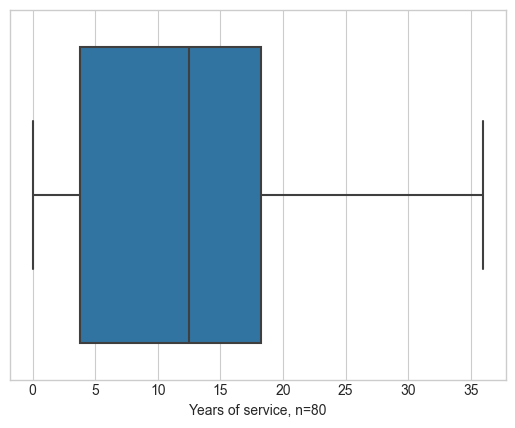

In [28]:
ax3 = sns.boxplot(x = df['years_of_service'])

ax3.set_xlabel('Years of service, n=' + str(df['years_of_service'].count()))

In [29]:
df.count()   # some data type infos about the table

gender                    82
age                       82
family                    82
education                 81
years_of_service          80
salary                    82
sat_management            82
sat_colleques             81
sat_workingEnvironment    82
sat_salary                82
sat_tasks                 82
dtype: int64

In [30]:
df.nlargest(n = 3, columns = 'education')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
16,1,26,1,4.0,2.0,5225,5,5.0,5,4,5
66,1,37,2,4.0,8.0,5069,3,4.0,3,2,2
11,1,40,2,3.0,21.0,2846,3,5.0,3,1,2


In [31]:
df1=pd.crosstab(df['education'], 'Count')
df1

col_0,Count
education,
1.0,27
2.0,30
3.0,22
4.0,2


In [32]:
df1.index=['Primary school','Secondary school graduate','Bachelor level','Master level']
df1.columns.name=''
df1

,Count
Primary school,27
Secondary school graduate,30
Bachelor level,22
Master level,2


In [33]:
sum(df1['Count'])

81

Text(0.5, 0, 'Count, N=102')

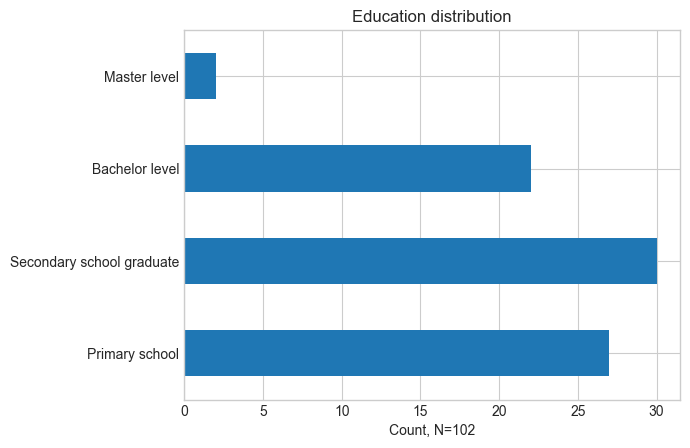

In [34]:
df1.plot.barh(legend = False)

plt.title('Education distribution')
plt.xlabel('Count, N=102')

In [35]:
df2 = pd.crosstab(df['education'], 'Count')
df2['%'] = df2['Count'] / df2['Count'].sum() * 100
df2.index=['Primary school','Secondary school graduate','Bachelor level','Master level']
df2.columns.name=''
df2

,Count,%
Primary school,27,33.333333
Secondary school graduate,30,37.037037
Bachelor level,22,27.160494
Master level,2,2.469136


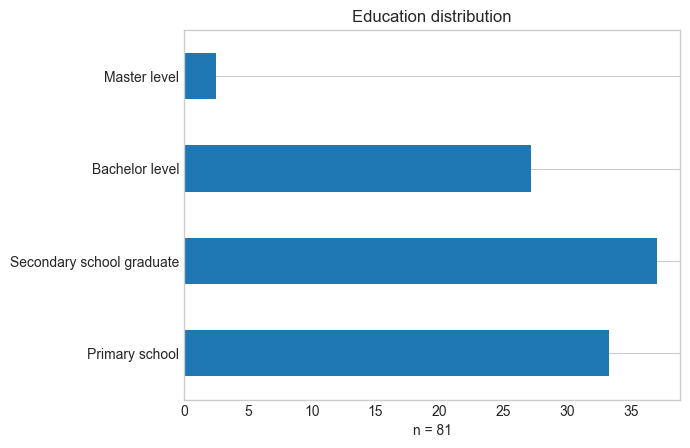

In [36]:
df2['%'].plot.barh(zorder = 2)

plt.title('Education distribution')

plt.xlabel('n = ' + str(df2['Count'].sum()))

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)

In [37]:
sum(df1['Count']) # counts how many people have input their edu level

81

# the quantitive measures and codes are for YEARS OF SERVICE 

In [38]:
max(df['years_of_service'])

36.0

In [39]:
min(df['years_of_service'])

0.0

In [40]:
bins = [0, 10, 20, 30, 40]

In [41]:
df['years_of_service'] = pd.cut(df['years_of_service'], bins = bins)
df

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,38,1,1.0,"(20.0, 30.0]",3587,3,3.0,3,3,3
1,1,29,2,2.0,"(0.0, 10.0]",2963,1,5.0,2,1,3
2,1,30,1,1.0,"(0.0, 10.0]",1989,3,4.0,1,1,3
3,1,36,2,1.0,"(10.0, 20.0]",2144,3,3.0,3,3,3
4,1,24,1,2.0,"(0.0, 10.0]",2183,2,3.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
77,1,22,1,3.0,NaN,1598,4,4.0,4,3,4
78,1,33,1,1.0,"(0.0, 10.0]",1638,1,3.0,2,1,2
79,1,27,1,2.0,"(0.0, 10.0]",2612,3,4.0,3,3,3
80,1,35,2,2.0,"(10.0, 20.0]",2808,3,4.0,3,3,3


In [42]:
df2.columns.name = ''
#percentages 
n = df2['Count'].sum()
df2['%']= df2 / n * 100
df2

ValueError: Columns must be same length as key

In [ ]:
print(type(df2.index.values[0]))

<class 'pandas._libs.interval.Interval'>


In [ ]:
df2.index = df2.index.astype(str)
df2.loc['Total'] = df2.sum()
df2

,Count,%
years_of_service,,
"(0, 10]",34.0,44.736842
"(10, 20]",26.0,34.210526
"(20, 30]",14.0,18.421053
"(30, 40]",2.0,2.631579
Total,76.0,100.000000


In [ ]:
print(type(df2.index.values[0]))

<class 'str'>


In [ ]:
# Finalizing the layout
df2.style.format({'Count': '{:.0f}', '%': '{:.1f} %'})

,Count,%
years_of_service,,
"(0, 10]",34,44.7 %
"(10, 20]",26,34.2 %
"(20, 30]",14,18.4 %
"(30, 40]",2,2.6 %
Total,76,100.0 %


Text(0, 0.5, 'Count, n=76')

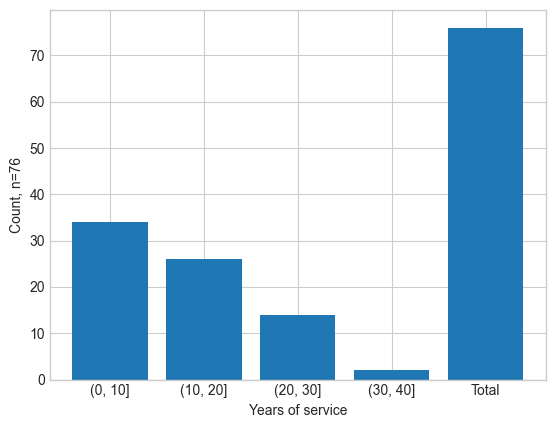

In [ ]:
df2_reset = df2.reset_index()

# Extract the 'years_of_service' column for the histogram
years_of_service = df2_reset['years_of_service']
# Extract the 'Count' column as the data for the bar heights
counts = df2_reset['Count']

plt.bar(years_of_service, counts)
plt.xlabel('Years of service')
plt.ylabel('Count, n=' + str(n))

# Present the results (education and years_of_service) of the cross tabulations in tables and graphically

In [ ]:
df3 = pd.crosstab(df['education'], df['years_of_service'], normalize = 'columns') * 100
df3.index = ['Primary school','Secondary school graduate','Bachelor level','Master level']
df3

years_of_service,"(0, 10]","(10, 20]","(20, 30]","(30, 40]"
Primary school,23.529412,38.461538,42.857143,50.0
Secondary school graduate,50.000000,26.923077,28.571429,50.0
Bachelor level,20.588235,34.615385,28.571429,0.0
Master level,5.882353,0.000000,0.000000,0.0


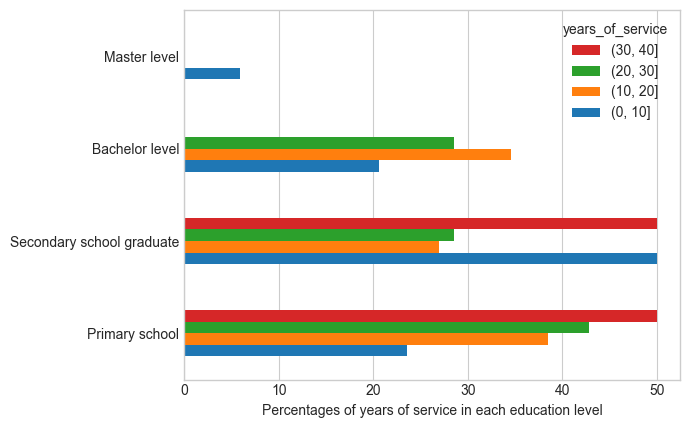

In [ ]:
df3.plot.barh(legend = 'reverse')

plt.xlabel('Percentages of years of service in each education level')

plt.grid(axis = 'y')